# Задание

- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите следующие модели:
  - Одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
  - SVM;
  - Дерево решений.
- Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
- Постройте график, показывающий важность признаков в дереве решений.
- Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.


Выбранный датасет (цена на машины):
Содержание:
- Производитель
- Модель
- Продажи в тысячах
- Тип машины
- Цена в тысячах
- Размер двигателя
- Лошадиные силы
- Колесная база
- Ширина
- Длина
- Вес
- Размер бака топлива
- Мили на галлон

In [30]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [31]:
data = pd.read_csv('data/Car_sales.csv')

In [32]:
data.shape, data.Price_in_thousands.shape

((157, 16), (157,))

In [33]:
data.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [34]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [35]:
data = data.dropna(axis=0, how='any')
(data.shape, data.Price_in_thousands.shape)

((117, 16), (117,))

Теперь пустых значений нет

In [36]:
data.head()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


### Кодирование категориальных признаков

In [37]:
data['Vehicle_type'].unique()

array(['Passenger', 'Car'], dtype=object)

In [38]:
data['Manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury', 'Mercedes-B',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saturn',
       'Toyota', 'Volkswagen'], dtype=object)

In [39]:
Vehicle_type_dict = {'Passenger': 0, 'Car': 1}
# ['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
#        'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
#        'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury', 'Mercedes-B',
#        'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saturn',
#        'Toyota', 'Volkswagen']
Manufacturer_type_dict  = {
    'Acure': 0, 'Audi': 1, 'BMW': 2, 'Buick': 3, 'Cadillac': 4, 'Chevrolet': 5,
    'Chrysler': 6, 'Dodge': 7, 'Ford': 8, 'Honda': 9, 'Hyundai': 10, 'Infiniti': 11,
    'Jeep': 12, 'Lexus': 13, 'Lincoln': 14, 'Mitsubishi': 15, 'Mercury': 16, 'Mercedes-B': 17,
    'Nissan': 18, 'Oldsmobile': 19, 'Plymouth': 20, 'Pontiac': 21, 'Porsche': 22, 'Saturn': 23,
    'Toyota': 24, 'Volkswagen': 25
}
data['Vehicle_type'] = data['Vehicle_type'].map(Vehicle_type_dict)
data['Manufacturer'] = data['Manufacturer'].map(Manufacturer_type_dict)
data = data.dropna(axis=0, how='any')
df_encoded = data.drop(columns=[ 'Model', 'Vehicle_type', 'Latest_Launch', '__year_resale_value', 'Power_perf_factor'])
print(df_encoded)

     Manufacturer  Sales_in_thousands  Price_in_thousands  Engine_size  \
4             1.0              20.397               23.99          1.8   
5             1.0              18.780               33.95          2.8   
6             1.0               1.380               62.00          4.2   
8             2.0               9.231               33.40          2.8   
9             2.0              17.527               38.90          2.8   
..            ...                 ...                 ...          ...   
145          25.0               9.761               14.90          2.0   
146          25.0              83.721               16.70          2.0   
147          25.0              51.102               21.20          1.8   
148          25.0               9.569               19.99          2.0   
149          25.0               5.596               17.50          2.0   

     Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
4         150.0      102.6   68.2   17

### Разделим выборку на обучающую и тестовую

In [40]:
from sklearn.model_selection import train_test_split

Выделим вектор переменных целевого признака, и матрицу признаков(без целевого)

In [41]:
X = df_encoded.drop("Price_in_thousands", axis=1)
y = df_encoded["Price_in_thousands"]

In [42]:
print(X.head(), "\n")
print(y.head())

   Manufacturer  Sales_in_thousands  Engine_size  Horsepower  Wheelbase  \
4           1.0              20.397          1.8       150.0      102.6   
5           1.0              18.780          2.8       200.0      108.7   
6           1.0               1.380          4.2       310.0      113.0   
8           2.0               9.231          2.8       193.0      107.3   
9           2.0              17.527          2.8       193.0      111.4   

   Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency  
4   68.2   178.0        2.998           16.4             27.0  
5   76.1   192.0        3.561           18.5             22.0  
6   74.0   198.2        3.902           23.7             21.0  
8   68.5   176.0        3.197           16.6             24.0  
9   70.9   188.0        3.472           18.5             25.0   

4    23.99
5    33.95
6    62.00
8    33.40
9    38.90
Name: Price_in_thousands, dtype: float64


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# y_train = pd.cut(y_train, bins=3, labels=False)

In [44]:
X_train.shape, y_train.shape,

((85, 10), (85,))

In [45]:
X_test.shape, y_test.shape

((29, 10), (29,))

### Обучение моделей

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Train models
linear_regression = LinearRegression()
svm = SVR()
decision_tree = DecisionTreeRegressor()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [48]:
svm.fit(X_train, y_train)
# y_train.dtypes
decision_tree = decision_tree.fit(X_train, y_train)

In [49]:
# Evaluate models
linear_regression_pred = linear_regression.predict(X_test)
print(linear_regression_pred)

[13.68894486 20.71134402 35.87599297 21.22909534 29.40437007 37.50510684
 15.02614852 11.14159871 38.67532824 15.29075963 15.10603777 17.10035546
 25.9115925  21.92336392 12.98252448  4.7928657  30.00854736  6.83278389
 15.72131003 30.22086217  8.16577099 42.99623106  8.21555014 20.73693469
 41.13258776 42.64248796 13.52120237 15.61479003 27.63543861]


In [50]:
svm_pred = svm.predict(X_test)
print(svm_pred)

[19.15923607 21.40019042 27.12406187 20.11013376 21.6328826  26.01253769
 19.78893016 18.87822915 26.54835884 19.35210791 21.55337711 17.8286848
 20.45313878 20.75353788 19.715798   18.64932478 24.19935776 17.65409267
 19.29456195 23.91813586 17.82177275 26.0460166  17.29299724 22.75516326
 26.62238765 28.73502249 19.6583452  20.41212068 22.26101158]


In [51]:
decision_tree_pred = decision_tree.predict(X_test)
print(decision_tree_pred)

[14.999 20.23  31.01  13.499 21.665 31.505 11.528 11.799 31.75  22.51
 17.035 13.96  17.035 16.535 14.999 16.98  33.95  14.999 14.9   36.229
 11.799 24.34  11.528 18.89  26.6   54.005 11.799 20.23  18.575]


In [52]:
print(y_test)

58     15.350
10     21.975
11     25.300
139    16.875
69     26.895
124    41.430
131    14.290
35     12.640
65     29.465
53     21.410
108    18.145
136    13.108
147    21.200
119    19.720
31     16.480
55     12.050
9      38.900
19     13.260
149    17.500
112    31.598
46     12.070
93     49.900
129    10.685
22     19.390
71     37.805
14     39.895
114    12.640
88     19.035
85     22.527
Name: Price_in_thousands, dtype: float64


In [53]:
linear_regression_mse = mean_squared_error(y_test, linear_regression_pred)
svr_mse = mean_squared_error(y_test, svm_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)

In [54]:

linear_regression_r2 = r2_score(y_test, linear_regression_pred)
svr_r2 = r2_score(y_test, svm_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

In [55]:
print("Linear Regression MSE:", linear_regression_mse)
print("SVM Accuracy:", svr_mse)
print("Decision Tree Accuracy:", decision_tree_mse)

Linear Regression MSE: 22.499758625948438
SVM Accuracy: 59.34448938091495
Decision Tree Accuracy: 44.69728617241379


In [56]:
print("Linear Regression R²:", linear_regression_r2)
print("SVR R²:", svr_r2)
print("Decision Tree R²:", decision_tree_r2)

Linear Regression R²: 0.786895539288077
SVR R²: 0.43792395216367674
Decision Tree R²: 0.5766536333383792


### График, показывающий важность признаков в дереве решений.

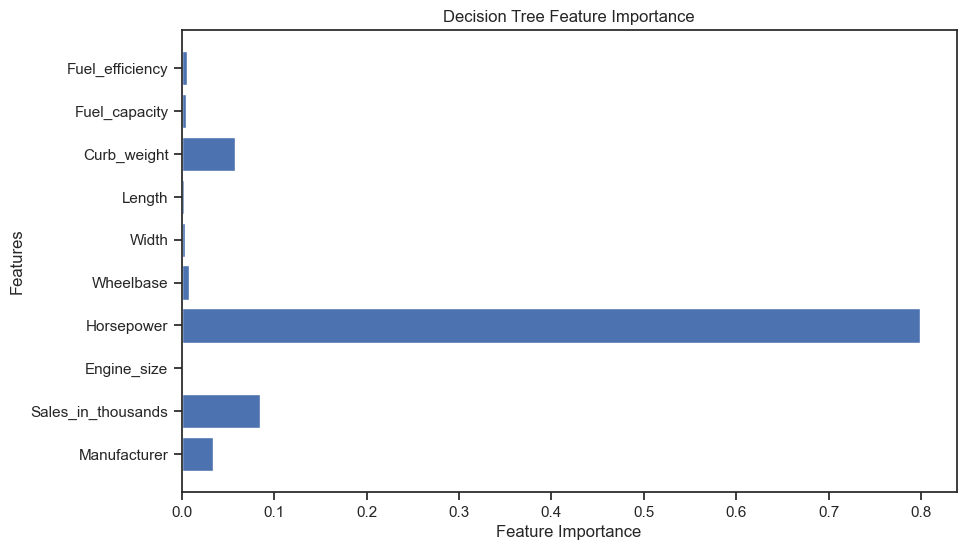

In [57]:
feature_importances = decision_tree.feature_importances_

# Get the names of the features
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

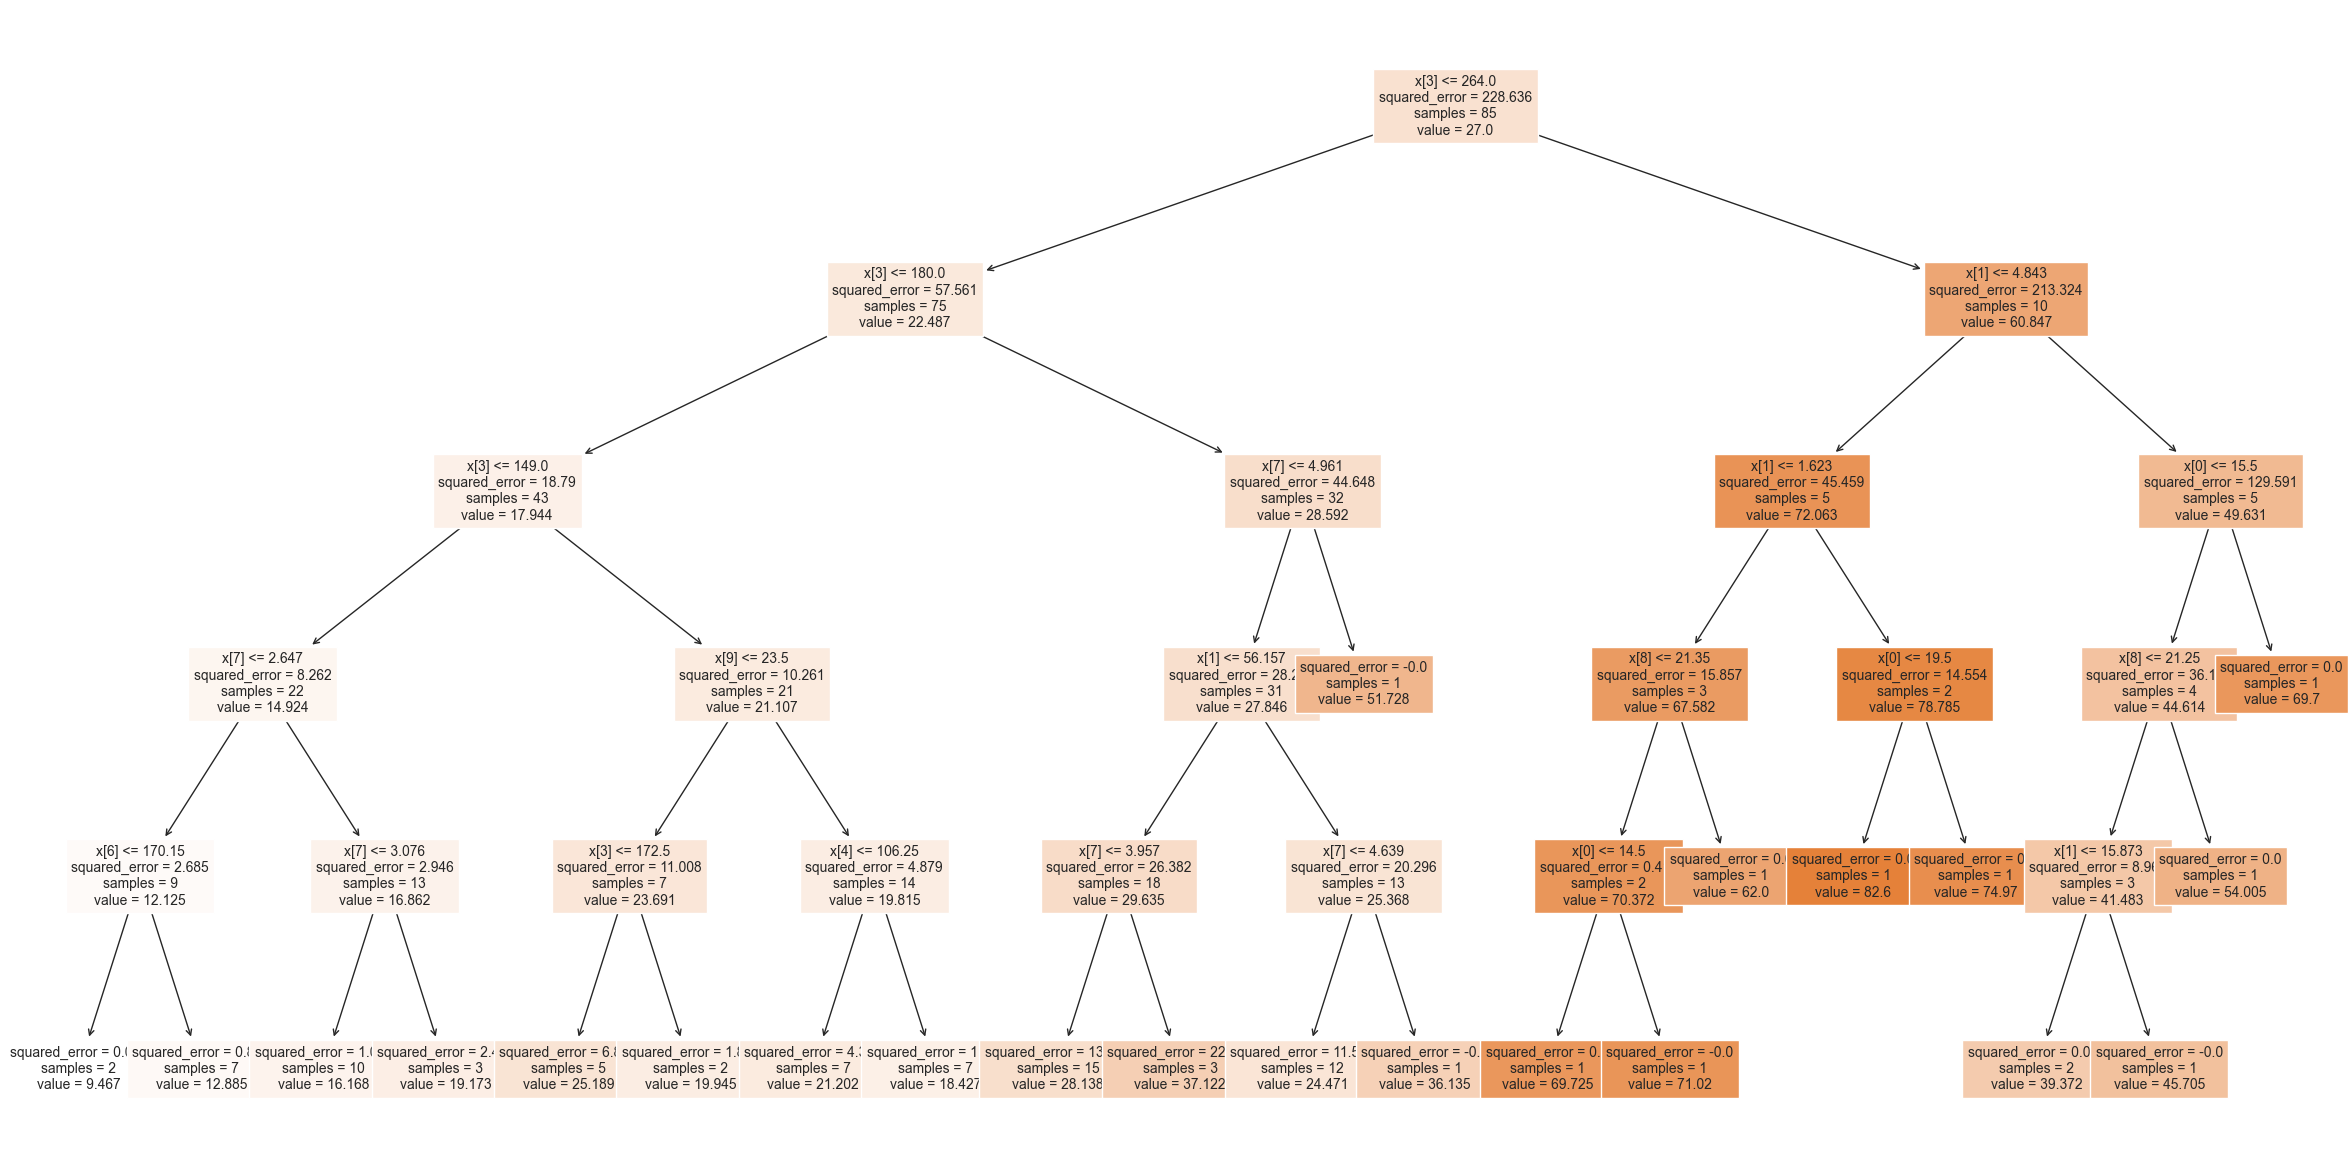

In [58]:
from sklearn.tree import plot_tree

# Initialize the decision tree classifier
clf = DecisionTreeRegressor(max_depth=5, random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(30, 15))
plot_tree(clf, fontsize=10, filled=True)
plt.show()